# APDFT Analysis

Predictions can use

- **QC**: HF, CCSD, or CCSD(T) energy differences with the species of interests or target,
- **APDFT**: HF, CCSD, or CCSD(T) energy differences by changing the nuclear charge of other systems that have the same number of electrons as the target,
- **APDFT*n***: Taylor series approximation with order *n* of the APDFT potential energy surface.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['font.size'] = 12

from apdft_tools.utils import hartree_to_ev, all_dimer_systems
from apdft_tools.data import prepare_dfs
from apdft_tools.prediction import *
from apdft_tools.analysis import apdft_error_change_charge_dimer

json_path = '../../json-data/dimer-pyscf.apdft-data.posthf.json'
df_qc, df_apdft = prepare_dfs(json_path, get_CBS=False)

## Alchemy prediction errors

There is some intrinsic error in modeling a target system (e.g., N atom) by changing the nuclear charge of a reference system's basis set (e.g., C<sup> &ndash;</sup> ).
The following cell computes this error, and represents the best performance for alchemy without fortuitous errors.

In [2]:
system_label = 'c.h'
delta_charge = 1
target_initial_charge = 0  # Initial charge of the system.
basis_set = 'cc-pV5Z'
lambda_specific_atom = 0
change_signs = False  # Multiple all predictions by negative one (e.g., for electron affinities)

n_points = 2
poly_order = 4

qm_color = '#577590'
apdft_colors = ["#F94144", "#F8961E", "#43AA8B"]

In [3]:
use_fin_diff = False  # Use finite differences with Taylor series for APDFT predictions.
remove_outliers = True

ie_qc_prediction = get_qc_change_charge_dimer(
    df_qc, system_label, delta_charge,
    target_initial_charge=target_initial_charge,
    change_signs=change_signs, basis_set=basis_set,
    n_points=n_points, poly_order=poly_order, remove_outliers=remove_outliers
)
ie_apdft_predictions = get_apdft_change_charge_dimer(
    df_qc, df_apdft, system_label, delta_charge,
    target_initial_charge=target_initial_charge,
    change_signs=change_signs, basis_set=basis_set,
    use_fin_diff=use_fin_diff, lambda_specific_atom=lambda_specific_atom,
    n_points=n_points, poly_order=poly_order, remove_outliers=remove_outliers
)

ie_qc_prediction = hartree_to_ev(ie_qc_prediction)
ie_apdft_predictions = {key:hartree_to_ev(value) for (key,value) in ie_apdft_predictions.items()}
ie_apdft_errors = {key:value-ie_qc_prediction for (key,value) in ie_apdft_predictions.items()}

print(f'PySCF prediction of IE for {system_label}: {ie_qc_prediction:.3f} eV\n')
print(f'APDFT prediction errors in eV:')
print(pd.DataFrame(ie_apdft_errors, index=[f'APDFT']))

PySCF prediction of IE for c.h: 10.625 eV

APDFT prediction errors in eV:
           b.h       n.h
APDFT -0.00391 -0.023215


## APDFT*n* prediction errors

Now, we can look at approximating the APDFT prediction by using a Taylor series centered on $\Delta Z = 0$.

In [4]:
use_fin_diff = True  # Use finite differences with Taylor series for APDFT predictions.
remove_outliers = True

ie_qc_prediction = get_qc_change_charge_dimer(
    df_qc, system_label, delta_charge,
    target_initial_charge=target_initial_charge,
    change_signs=change_signs, basis_set=basis_set,
    n_points=n_points, poly_order=poly_order, remove_outliers=remove_outliers
)
ie_apdft_predictions = get_apdft_change_charge_dimer(
    df_qc, df_apdft, system_label, delta_charge,
    target_initial_charge=target_initial_charge,
    change_signs=change_signs, basis_set=basis_set,
    use_fin_diff=use_fin_diff, lambda_specific_atom=lambda_specific_atom,
    n_points=n_points, poly_order=poly_order, remove_outliers=remove_outliers
)

ie_qc_prediction = hartree_to_ev(ie_qc_prediction)
ie_apdft_predictions = {key:hartree_to_ev(value) for (key,value) in ie_apdft_predictions.items()}
ie_apdft_errors = {key:value-ie_qc_prediction for (key,value) in ie_apdft_predictions.items()}

print(f'PySCF prediction of IE for {system_label}: {ie_qc_prediction:.3f} eV\n')
print(f'APDFTn prediction errors in eV:')
print(pd.DataFrame(ie_apdft_errors, index=[f'APDFT{n}' for n in range(5)]))

PySCF prediction of IE for c.h: 10.625 eV

APDFTn prediction errors in eV:
              b.h        n.h
APDFT0 -10.676304  15.824991
APDFT1  -2.933397  -2.474227
APDFT2  -0.197748  -0.037280
APDFT3   0.440954  -0.089914
APDFT4   1.183081  -0.336727


/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(


### Specifying lambda values

We can also specify specific lambda values to include. For example, we could only look at lambda values of +-1.

In [5]:
considered_lambdas = [-1]
use_fin_diff = True  # Use finite differences with Taylor series for APDFT predictions.
remove_outliers = True

ie_qc_prediction = get_qc_change_charge_dimer(
    df_qc, system_label, delta_charge,
    target_initial_charge=target_initial_charge,
    change_signs=change_signs, basis_set=basis_set,
    n_points=n_points, poly_order=poly_order, remove_outliers=remove_outliers
)
ie_apdft_predictions = get_apdft_change_charge_dimer(
    df_qc, df_apdft, system_label, delta_charge,
    target_initial_charge=target_initial_charge,
    change_signs=change_signs, basis_set=basis_set,
    use_fin_diff=use_fin_diff, lambda_specific_atom=lambda_specific_atom,
    n_points=n_points, poly_order=poly_order, remove_outliers=remove_outliers,
    considered_lambdas=considered_lambdas
)

ie_qc_prediction = hartree_to_ev(ie_qc_prediction)
ie_apdft_predictions = {key:hartree_to_ev(value) for (key,value) in ie_apdft_predictions.items()}
ie_apdft_errors = {key:value-ie_qc_prediction for (key,value) in ie_apdft_predictions.items()}

print(f'PySCF prediction of IE for {system_label}: {ie_qc_prediction:.3f} eV\n')
print(f'APDFTn prediction errors in eV:')
print(pd.DataFrame(ie_apdft_errors, index=[f'APDFT{n}' for n in range(5)]))

PySCF prediction of IE for c.h: 10.625 eV

APDFTn prediction errors in eV:
              n.h
APDFT0  15.824991
APDFT1  -2.474227
APDFT2  -0.037280
APDFT3  -0.089914
APDFT4  -0.336727


/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(


## APDFT*n* errors with respect to alchemy

Or you, can compute the difference between APDFT*n* (predictions with Taylor series) and APDFT.

In [6]:
use_fin_diff = True  # Use finite differences with Taylor series for APDFT predictions.

ie_apdft_predictions = get_apdft_change_charge_dimer(
    df_qc, df_apdft, system_label, delta_charge,
    target_initial_charge=target_initial_charge,
    change_signs=change_signs, basis_set=basis_set,
    use_fin_diff=use_fin_diff, lambda_specific_atom=lambda_specific_atom,
    n_points=n_points, poly_order=poly_order, remove_outliers=True,
    compute_difference=True
)

ie_apdft_predictions = {key:hartree_to_ev(value) for (key,value) in ie_apdft_predictions.items()}

print(f'Differences between APDFTn and APDFT in eV:')
print(pd.DataFrame(ie_apdft_predictions, index=[f'APDFT{n}' for n in range(5)]))

Differences between APDFTn and APDFT in eV:
              b.h        n.h
APDFT0 -10.672394  15.848206
APDFT1  -2.929487  -2.451012
APDFT2  -0.193837  -0.014065
APDFT3   0.444864  -0.066699
APDFT4   1.186991  -0.313512


/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(


## IP visualization


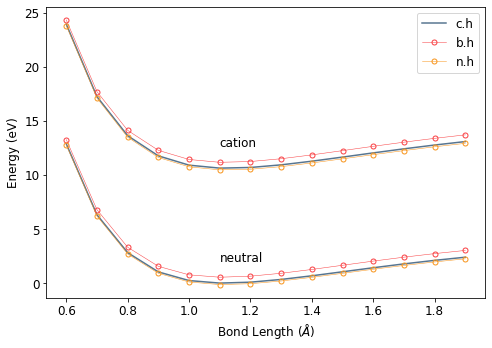

In [7]:
target_initial_charge = 0
delta_charge = 1

use_fin_diff = False
apdft_order = 2

target_final_charge = target_initial_charge + delta_charge

# Reference QC data

bl_qc_target_initial, e_qc_target_initial = dimer_binding_curve(
    df_qc, system_label, target_initial_charge,
    excitation_level=0, calc_type='qc'
)
bl_qc_target_final, e_qc_target_final = dimer_binding_curve(
    df_qc, system_label, target_final_charge,
    excitation_level=0, calc_type='qc'
)

bl_qc_ref_initial, e_qc_ref_initial = dimer_binding_curve(
    df_qc, system_label, target_initial_charge, df_apdft=df_apdft,
    excitation_level=0, calc_type='alchemy',
    use_fin_diff=use_fin_diff, n_points=n_points, poly_order=poly_order
)
bl_qc_ref_final, e_qc_ref_final = dimer_binding_curve(
    df_qc, system_label, target_final_charge, df_apdft=df_apdft,
    excitation_level=0, calc_type='alchemy',
    use_fin_diff=use_fin_diff, n_points=n_points, poly_order=poly_order
)


e_reference = np.min(e_qc_target_initial[system_label])

e_qc_target_initial = e_qc_target_initial[system_label] - e_reference
e_qc_target_final = e_qc_target_final[system_label] - e_reference

###   FIGURE   ###
# Plots the QC bond length curve.

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.patch.set_facecolor('white')

ax.plot(
    bl_qc_target_initial[system_label], hartree_to_ev(e_qc_target_initial),
    marker='', markersize=5,
    linewidth=1.5, color=qm_color, label=system_label
)
ax.plot(
    bl_qc_target_final[system_label], hartree_to_ev(e_qc_target_final),
    marker='', markersize=5,
    linewidth=1.5, color=qm_color
)


i = 0
for sys_label in e_qc_ref_initial.keys():
    try:
        bl_initial = bl_qc_ref_initial[sys_label]
        bl_final = bl_qc_ref_final[sys_label]
        e_initial = e_qc_ref_initial[sys_label]
        e_final = e_qc_ref_final[sys_label]
    except KeyError:
        continue
    
    ax.plot(
        bl_initial, hartree_to_ev(e_initial - e_reference),
        marker='o', markersize=5, fillstyle='none',
        linewidth=0.5, color=apdft_colors[i], label=sys_label
    )
    ax.plot(
        bl_final, hartree_to_ev(e_final - e_reference),
        marker='o', markersize=5, fillstyle='none',
        linewidth=0.5, color=apdft_colors[i]
    )
    i += 1

ax.set_xlabel('Bond Length ($\AA$)')
ax.set_ylabel('Energy (eV)')

bl_text_idx = np.argmin(e_qc_target_initial)
e_charged_text_idx = np.argmin(e_qc_target_final)
e_buff = 2

ax.text(
    bl_qc_target_initial[system_label][bl_text_idx], 0 + e_buff, 'neutral'
)
ax.text(
    bl_qc_target_initial[system_label][bl_text_idx],
    hartree_to_ev(e_qc_target_final[e_charged_text_idx]) + e_buff,
    'cation'
)

ax.legend()

## Overall statistics

We can also compute mean absolute errors (MAEs), root mean squared error (RMSE) and max error.

In [8]:
all_systems = all_dimer_systems[1:-1]
target_initial_charge = 0

considered_lambdas = None
compute_difference = True
use_fin_diff = True  # Use finite differences with Taylor series for APDFT predictions.
remove_outliers = True
delta_charge = 1
max_apdft_order = 4

for i in range(len(all_systems)):
    sys_error = apdft_error_change_charge_dimer(
        df_qc, df_apdft, all_systems[i], delta_charge,
        target_initial_charge=target_initial_charge,
        change_signs=change_signs, basis_set=basis_set,
        use_fin_diff=use_fin_diff, lambda_specific_atom=lambda_specific_atom,
        n_points=n_points, poly_order=poly_order, remove_outliers=remove_outliers,
        compute_difference=compute_difference, considered_lambdas=considered_lambdas
    )
    if i == 0:
        all_error = sys_error
    else:
        all_error = pd.concat(
            [all_error, sys_error], axis=1
        )

if use_fin_diff or compute_difference == True:
    # MAE
    for n in range(0, max_apdft_order+1):
        apdftn_errors = all_error.iloc[n].values
        apdftn_mae = np.mean(np.abs(apdftn_errors))
        print(f'APDFT{n} MAE: {apdftn_mae:.4f} eV')

    # RMSE
    print()
    for n in range(0, max_apdft_order+1):
        apdftn_errors = all_error.iloc[n].values
        apdftn_rmse = np.sqrt(np.mean((apdftn_errors)**2))
        print(f'APDFT{n} RMSE: {apdftn_rmse:.4f} eV')
    
    # Max
    print()
    for n in range(0, max_apdft_order+1):
        apdftn_errors = all_error.iloc[n].values
        apdftn_max = np.max(np.abs(apdftn_errors))
        print(f'APDFT{n} max abs.: {apdftn_max:.4f} eV')
else:
    # MAE
    apdftn_errors = all_error.iloc[0].values
    apdftn_mae = np.mean(np.abs(apdftn_errors))
    print(f'APDFT MAE: {apdftn_mae:.4f} eV')

    # RMSE
    print()
    apdftn_rmse = np.sqrt(np.mean((apdftn_errors)**2))
    print(f'APDFT RMSE: {apdftn_rmse:.4f} eV')

    # Max
    print()
    apdftn_max = np.max(np.abs(apdftn_errors))
    print(f'APDFT max abs.: {apdftn_max:.4f} eV')


/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond

APDFT0 MAE: 13.1047 eV
APDFT1 MAE: 2.4033 eV
APDFT2 MAE: 0.1770 eV
APDFT3 MAE: 0.7105 eV
APDFT4 MAE: 1.3751 eV

APDFT0 RMSE: 13.3311 eV
APDFT1 RMSE: 2.4866 eV
APDFT2 RMSE: 0.2114 eV
APDFT3 RMSE: 0.9878 eV
APDFT4 RMSE: 2.7991 eV

APDFT0 max abs.: 15.8497 eV
APDFT1 max abs.: 3.2443 eV
APDFT2 max abs.: 0.4400 eV
APDFT3 max abs.: 2.1275 eV
APDFT4 max abs.: 9.2819 eV


/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
/home/alex/.local/lib/python3.8/site-packages/apdft_tools/prediction.py:609: RankWarning: Polyfit may be poorly conditioned
  bond_lengths_fit, poly_coeffs = fit_dimer_poly(
